## Predicting how "beautiful" someone is from LinkedIn profile data?

In [1]:
#Load libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
# Get the data

df = pd.read_csv('linkedin_data.csv', encoding = "ISO-8859-1").drop('Unnamed: 0', axis=1)
df.head()

,avg_n_pos_per_prev_tenure,avg_pos_len,avg_prev_tenure_len,c_name,m_urn,n_pos,n_prev_tenures,tenure_len,age,beauty,...,east_asian,european,greek,hispanic,jewish,muslim,nationality,nordic,south_asian,n_followers
0,2.000000,457.0,1338.0,TD,urn:li:member:149435456,1,1,457.0,37,57.57,...,0.877681,0.05267,3.167776e-08,0.000638,2.102663e-08,0.000001,east_asian,0.008284,0.000048,420
1,1.500000,212.0,897.5,Light Up The World (LUTW),urn:li:member:149435456,1,2,212.0,37,57.57,...,0.877681,0.05267,3.167776e-08,0.000638,2.102663e-08,0.000001,east_asian,0.008284,0.000048,420
2,1.333333,243.0,669.0,Glacier,urn:li:member:149435456,1,3,243.0,37,57.57,...,0.877681,0.05267,3.167776e-08,0.000638,2.102663e-08,0.000001,east_asian,0.008284,0.000048,420
3,1.250000,123.0,562.5,Sprout App,urn:li:member:149435456,1,4,123.0,37,57.57,...,0.877681,0.05267,3.167776e-08,0.000638,2.102663e-08,0.000001,east_asian,0.008284,0.000048,420
4,1.200000,244.0,474.6,College Pro,urn:li:member:149435456,1,5,244.0,37,57.57,...,0.877681,0.05267,3.167776e-08,0.000638,2.102663e-08,0.000001,east_asian,0.008284,0.000048,420


In [3]:
## Drop duplicates
df = df.drop_duplicates(keep= 'first')

## Check the shape 
df.shape


(62516, 51)

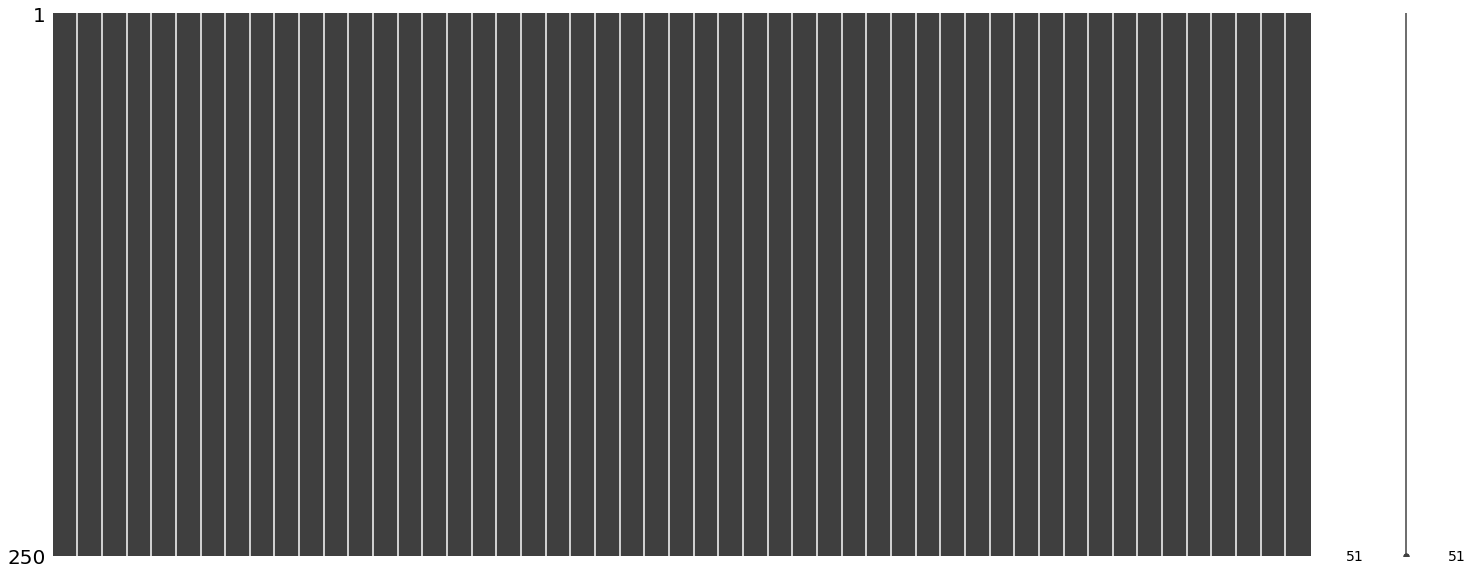

In [4]:
##Visually look to see how much missing data there is

import missingno as msno

msno.matrix(df.sample(250))

In [5]:
## Check the info 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62516 entries, 0 to 62708
Data columns (total 51 columns):
avg_n_pos_per_prev_tenure    62516 non-null float64
avg_pos_len                  62516 non-null float64
avg_prev_tenure_len          62516 non-null float64
c_name                       62510 non-null object
m_urn                        62516 non-null object
n_pos                        62516 non-null int64
n_prev_tenures               62516 non-null int64
tenure_len                   62516 non-null float64
age                          62516 non-null int64
beauty                       62516 non-null float64
beauty_female                62516 non-null float64
beauty_male                  62516 non-null float64
blur                         62516 non-null float64
blur_gaussian                62516 non-null float64
blur_motion                  62516 non-null float64
emo_anger                    62516 non-null float64
emo_disgust                  62516 non-null float64
emo_fear       

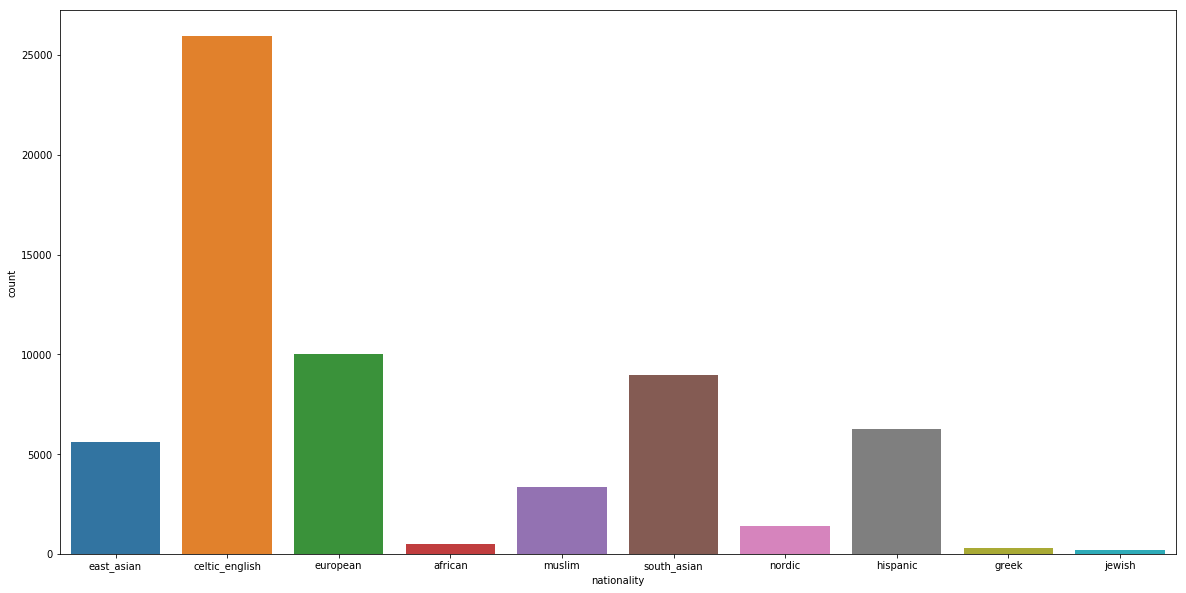

In [6]:
#Count of people by nationalities

fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(df['nationality'], ax=ax)

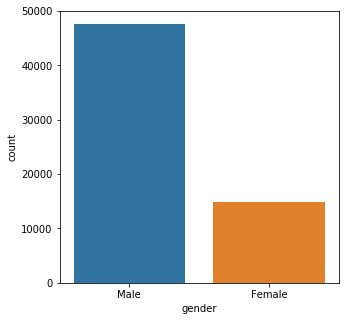

In [7]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(df['gender'], ax=ax)

In [8]:
## Only look for the columns with numbers
df_num = df.select_dtypes(include = ['float64', 'int64'])

In [9]:
## Check the stats
df_num.describe()

,avg_n_pos_per_prev_tenure,avg_pos_len,avg_prev_tenure_len,n_pos,n_prev_tenures,tenure_len,age,beauty,beauty_female,beauty_male,...,celtic_english,east_asian,european,greek,hispanic,jewish,muslim,nordic,south_asian,n_followers
count,62516.000000,62516.000000,62516.000000,62516.000000,62516.000000,62516.000000,62516.000000,62516.000000,62516.000000,62516.000000,...,6.251600e+04,6.251600e+04,6.251600e+04,6.251600e+04,6.251600e+04,6.251600e+04,6.251600e+04,6.251600e+04,6.251600e+04,62516.000000
mean,1.194316,765.709194,1100.654155,1.243394,3.501280,962.563648,44.050115,57.372721,59.923836,56.785731,...,3.974114e-01,8.919352e-02,1.566239e-01,5.409710e-03,1.142808e-01,3.917874e-03,4.884786e-02,2.438714e-02,1.428141e-01,1226.813328
std,0.506874,750.536652,985.872725,0.756962,3.116067,1086.790568,10.686563,11.765736,11.693665,11.762293,...,4.095206e-01,2.264850e-01,2.762128e-01,5.972230e-02,2.504241e-01,5.017661e-02,1.857962e-01,1.315097e-01,3.327970e-01,6416.195127
min,1.000000,-120.000000,0.000000,1.000000,1.000000,-120.000000,1.000000,18.402000,22.902000,18.402000,...,6.193657e-07,2.234445e-08,1.984528e-09,6.559303e-13,3.189344e-09,1.101943e-14,2.985315e-09,6.535971e-12,9.989902e-10,0.000000
25%,1.000000,274.000000,536.625000,1.000000,2.000000,304.000000,37.000000,49.031000,51.527000,48.452000,...,1.465626e-02,4.291657e-04,1.223991e-03,2.039014e-07,7.399272e-04,8.333970e-09,3.289525e-05,9.386688e-06,1.479398e-04,405.000000
50%,1.000000,578.000000,882.750000,1.000000,3.000000,640.000000,44.000000,56.895000,59.216000,56.338000,...,1.815728e-01,3.484411e-03,1.422733e-02,6.148261e-06,8.881128e-03,3.216258e-07,2.963564e-04,2.095073e-04,1.082053e-03,724.000000
75%,1.200000,1035.000000,1399.762500,1.000000,4.000000,1217.000000,51.000000,65.543000,67.916000,65.094250,...,9.004450e-01,3.028171e-02,1.496879e-01,1.355441e-04,6.930095e-02,2.879021e-05,2.524406e-03,2.292542e-03,1.142032e-02,1245.000000
max,15.000000,21884.000000,39781.000000,12.000000,49.000000,21884.000000,80.000000,92.431000,94.291000,92.431000,...,9.999714e-01,9.999612e-01,9.999458e-01,9.998394e-01,9.999802e-01,9.993178e-01,9.985210e-01,9.999736e-01,9.999225e-01,530566.000000


In [10]:
## See the variance

df_num.var()

avg_n_pos_per_prev_tenure    2.569216e-01
avg_pos_len                  5.633053e+05
avg_prev_tenure_len          9.719450e+05
n_pos                        5.729908e-01
n_prev_tenures               9.709876e+00
tenure_len                   1.181114e+06
age                          1.142026e+02
beauty                       1.384326e+02
beauty_female                1.367418e+02
beauty_male                  1.383515e+02
blur                         6.257478e+02
blur_gaussian                6.257478e+02
blur_motion                  6.257478e+02
emo_anger                    8.550193e+01
emo_disgust                  1.430846e+02
emo_fear                     6.108756e+01
emo_happiness                1.711257e+03
emo_neutral                  1.366628e+03
emo_sadness                  9.002218e+01
emo_surprise                 7.405748e+01
face_quality                 1.153596e+03
head_pitch                   3.801404e+01
head_roll                    7.122523e+01
head_yaw                     1.694

In [11]:
## Find how many unique values
df_num.nunique()

avg_n_pos_per_prev_tenure      246
avg_pos_len                   3049
avg_prev_tenure_len          13662
n_pos                           12
n_prev_tenures                  49
tenure_len                    1497
age                             77
beauty                       12951
beauty_female                13019
beauty_male                  12944
blur                          5958
blur_gaussian                 5958
blur_motion                   5958
emo_anger                     1890
emo_disgust                   2631
emo_fear                      1751
emo_happiness                 7030
emo_neutral                   5764
emo_sadness                   2124
emo_surprise                  2057
face_quality                 10901
head_pitch                   15486
head_roll                    15493
head_yaw                     15490
mouth_close                   3903
mouth_mask                     816
mouth_open                    3409
mouth_other                   2568
skin_acne           

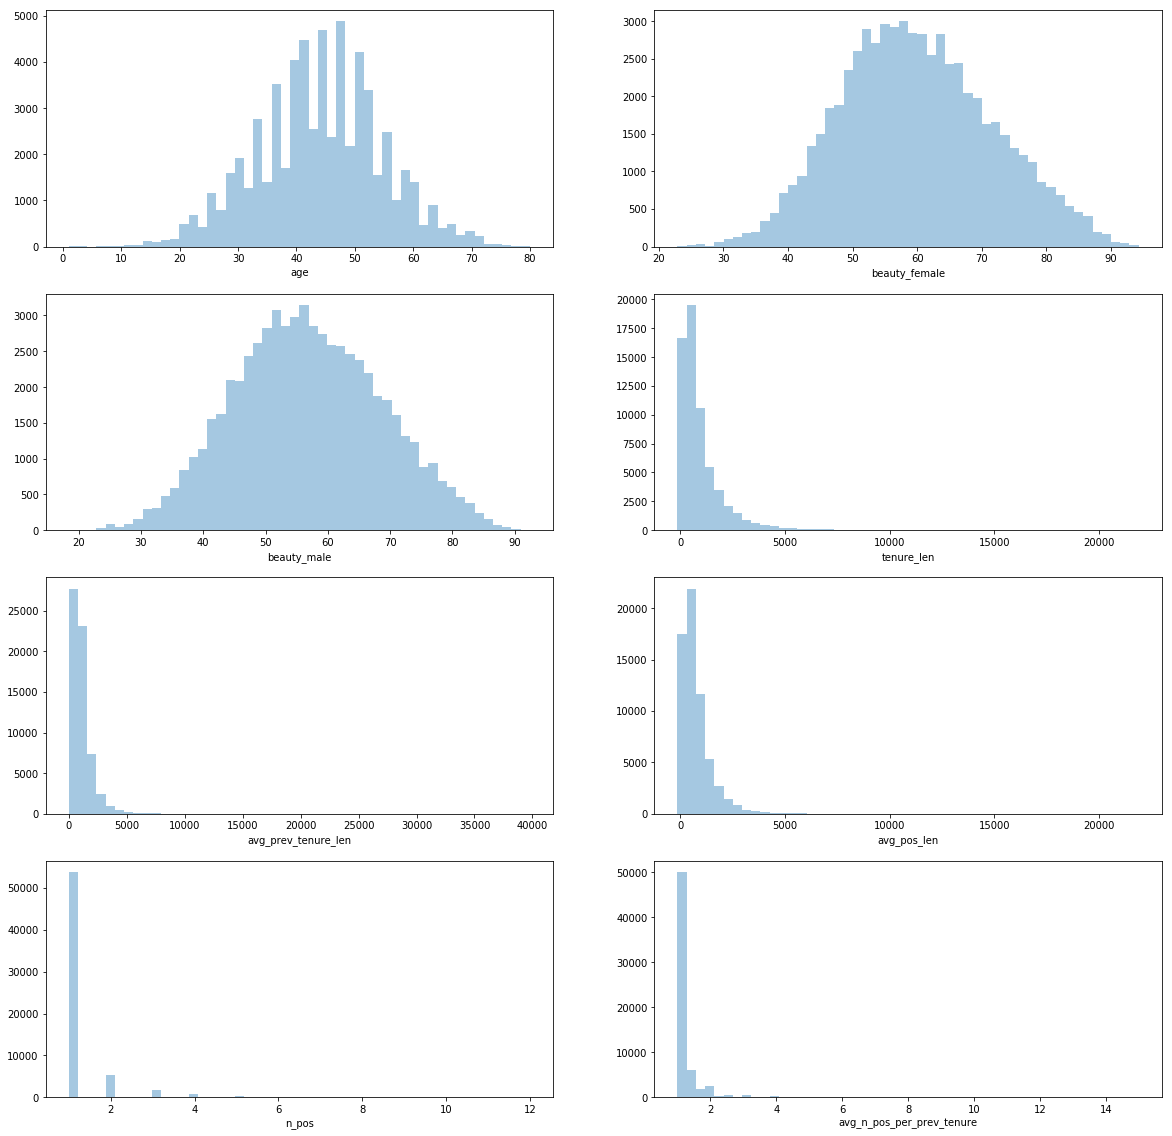

In [12]:
## Histrograms
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(20,20), sharex=False)
sns.distplot(df['age'], ax=ax[0,0],kde = False)
sns.distplot(df['beauty_female'], ax=ax[0,1],kde = False)
sns.distplot(df['beauty_male'], ax=ax[1,0],kde = False)
sns.distplot(df['tenure_len'], ax=ax[1,1],kde = False)
sns.distplot(df['avg_prev_tenure_len'], ax=ax[2,0],kde = False)
sns.distplot(df['avg_pos_len'], ax=ax[2,1],kde = False)
sns.distplot(df['n_pos'], ax=ax[3,0],kde = False)
sns.distplot(df['avg_n_pos_per_prev_tenure'], ax=ax[3,1],kde = False)
plt.show()

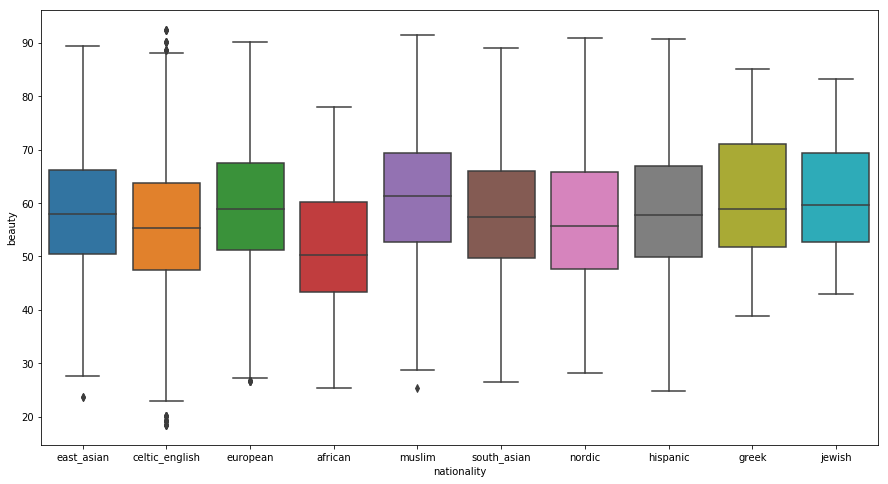

In [13]:
## Box plot

plt.figure(figsize=(15,8))
sns.boxplot(x="nationality", y="beauty", data=df)
plt.show()

In [14]:
df_num = df_num[(df_num.skin_health > 0) & (df_num.age > 18)]

In [15]:
#Isolate the correlation for beauty

correlation = df_num.drop(['beauty','beauty_male', 'beauty_female'], axis=1).apply(lambda x: x.corr(df_num.beauty))
print(correlation.sort_values(ascending=False))

skin_health                  0.289876
head_pitch                   0.233920
emo_neutral                  0.085971
mouth_close                  0.083128
muslim                       0.079307
european                     0.077481
emo_surprise                 0.037281
south_asian                  0.027347
hispanic                     0.024237
greek                        0.020356
emo_sadness                  0.019013
jewish                       0.016617
east_asian                   0.016339
skin_acne                    0.015284
face_quality                 0.009770
head_roll                    0.004755
n_followers                 -0.001454
emo_anger                   -0.002835
head_yaw                    -0.004236
mouth_other                 -0.005609
nordic                      -0.010849
emo_fear                    -0.010995
mouth_mask                  -0.014015
n_pos                       -0.016888
emo_disgust                 -0.022240
avg_n_pos_per_prev_tenure   -0.025736
smile       

Index(['beauty', 'beauty_male', 'beauty_female', 'skin_health', 'head_pitch',
       'emo_neutral', 'mouth_close', 'muslim', 'european', 'emo_surprise',
       'south_asian'],
      dtype='object')


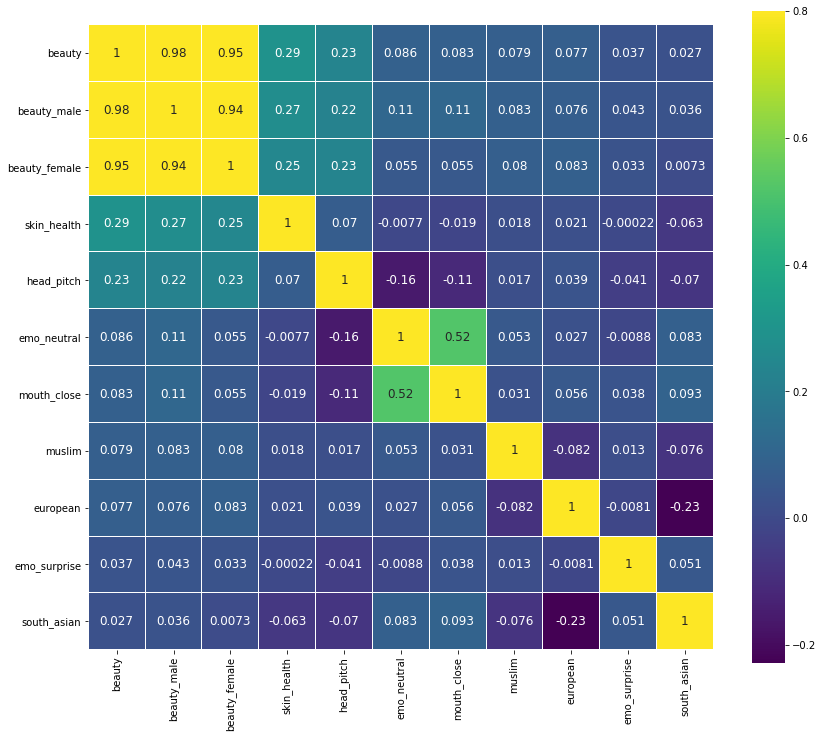

In [16]:
##Isolate the target and see the top k correlations

correlation = df_num.corr()  
k= 11
cols = correlation.nlargest(k,'beauty')['beauty'].index
print(cols)
cm = np.corrcoef(df_num[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

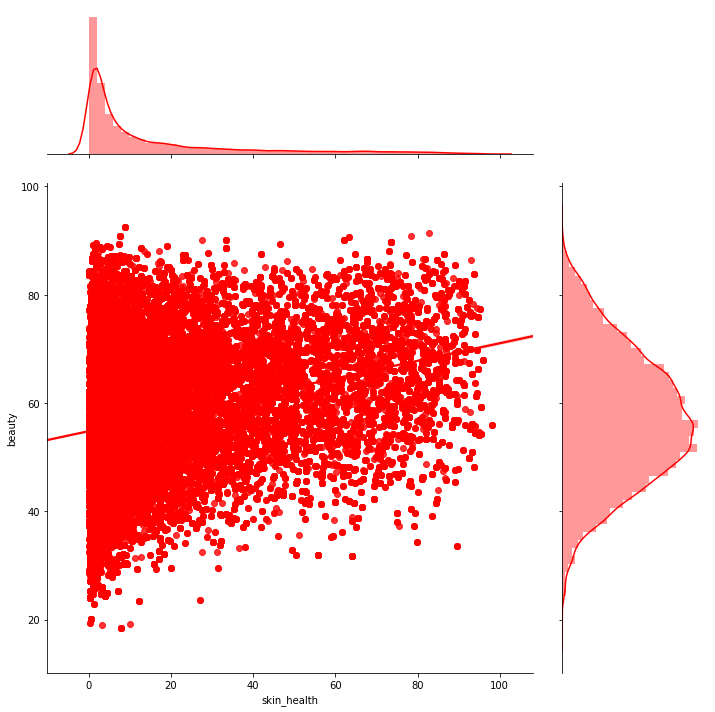

In [17]:
##Joint plot - scatter in middle and distribution on top and sides

sns.jointplot(x="skin_health", y="beauty", data=df_num, height=10, ratio=3, color="r", kind="reg")
plt.show()

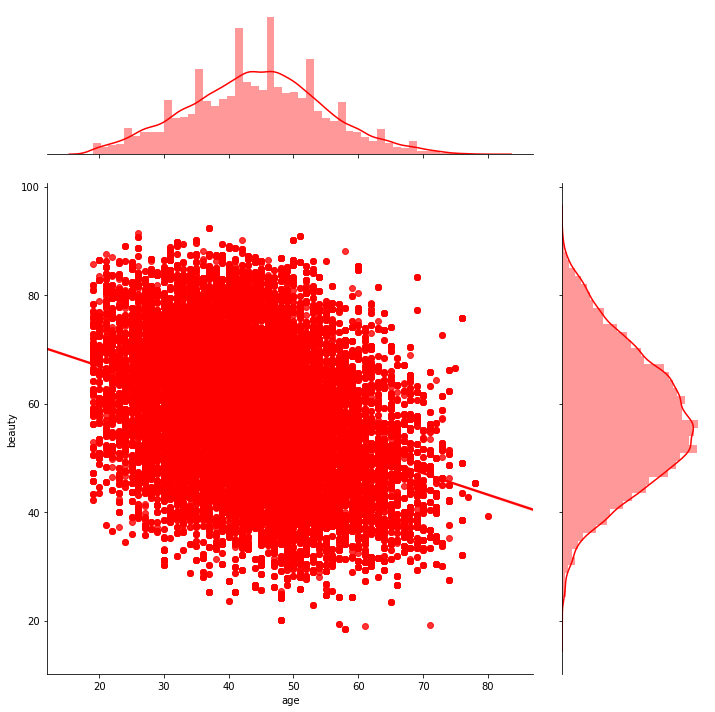

In [18]:
sns.jointplot(x="age", y="beauty", data=df_num, height=10, ratio=3, color="r", kind="reg")
plt.show()

In [19]:
#Split data into training and testing

from sklearn.model_selection import train_test_split

train, test = train_test_split(df_num, test_size=0.2)

y_train = train['beauty']
y_test = test['beauty']

X_train = train.drop(['beauty', 'beauty_male', 'beauty_female'], axis=1)
X_test = test.drop(['beauty', 'beauty_male', 'beauty_female'], axis=1)

In [20]:
# Import machine learning modules

from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 


# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    score = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    
    return train_pred, score



# Random Forest Regressor ----------------------------------------------------------------

train_pred_log, acc_rfor = fit_ml_algo(RandomForestRegressor(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)


In [21]:
# Linear Regression ---------------------------------------------------------------------

train_pred_log, acc_lin = fit_ml_algo(LinearRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)

In [22]:
# Decision Tree Regressor --------------------------------------------------------------------

train_pred_knn, acc_dtr = fit_ml_algo(DecisionTreeRegressor(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)

In [23]:
# Support Vector Regressor --------------------------------------------------------------------

train_pred_gaussian, acc_svr = fit_ml_algo(SVR(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)

Text(0.5, 1.0, 'Which Feature(s) are most important')

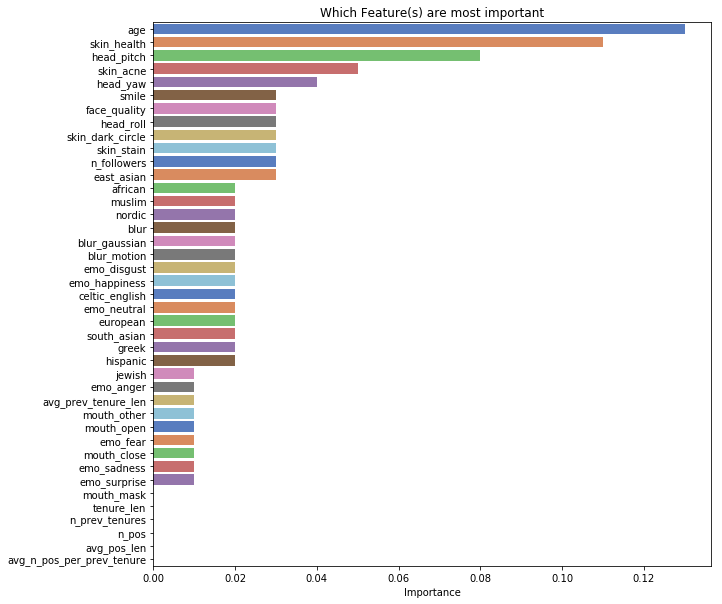

In [24]:
#Feature importance

rfr = RandomForestRegressor(n_estimators=1000, random_state=0, n_jobs=-1)
rfr.fit(X_train, y_train)

f_im = rfr.feature_importances_.round(2)
rank = pd.Series(f_im, index=X_train.columns).sort_values(ascending=False)

figsize = [10.0, 10.0]

plt.figure(figsize=figsize)
sns.barplot(y=rank.index,x=rank.values,palette='muted')
plt.xlabel('Importance')
plt.title('Which Feature(s) are most important')

In [25]:
# Accuracy Scores --------------------------------------------------------------------------

models = pd.DataFrame({
    'Model': ['RandomForestRegressor', 'LinearRegression', 'DecisionTreeRegressor', 'SVR' ],
    'Score': [
        acc_rfor,
        acc_lin, 
        acc_dtr, 
        acc_svr
    ]})
print("---Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Accuracy Scores---


,Model,Score
2,DecisionTreeRegressor,100.00
0,RandomForestRegressor,98.24
1,LinearRegression,28.06
3,SVR,13.03


In [26]:
#Choose model

X_train = np.array(X_train[['age', 'skin_health', 'head_pitch', 'skin_acne']])

y_train = np.array(y_train)

rfr = RandomForestRegressor()

model = rfr.fit(X_train, y_train)


# model score
print(round(model.score(X_train, y_train) * 100, 2))

98.35


In [30]:
print("Age range is: ", df_num.age.min(),"-",df_num.age.max())
print("Skin health range is: ", df_num.skin_health.min(),"-",df_num.skin_health.max())
print("Head pitch range is: ", df_num.head_pitch.min(),"-",df_num.head_pitch.max())
print("Skin acne range is: ", df_num.skin_acne.min(),"-",df_num.skin_acne.max())

Age range is:  19 - 80
Skin health range is:  0.023 - 98.036
Head pitch range is:  -33.915928 - 33.105206
Skin acne range is:  0.016 - 99.98700000000001


In [37]:
## function to predict how beautiful someone would be rated based on top features

def beauty_score(age, skin_health, head_pitch, skin_acne):
    
    print("With these feature scores the beauty rating would be:", round(float(model.predict([[age, skin_health, head_pitch, skin_acne]])),2), "/ 100")

#Predict test

beauty_score(33, 32, 12, 12)
print("The accuracy score is: ", round(model.score(X_train, y_train) * 100, 2),"%")

With these feature scores the beauty rating would be: 65.72 / 100
The accuracy score is:  98.35 %
